## Time Series Modeling

In [1]:
import pandas as pd
import numpy as np
# import statsmodel as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

### Sample Time Series

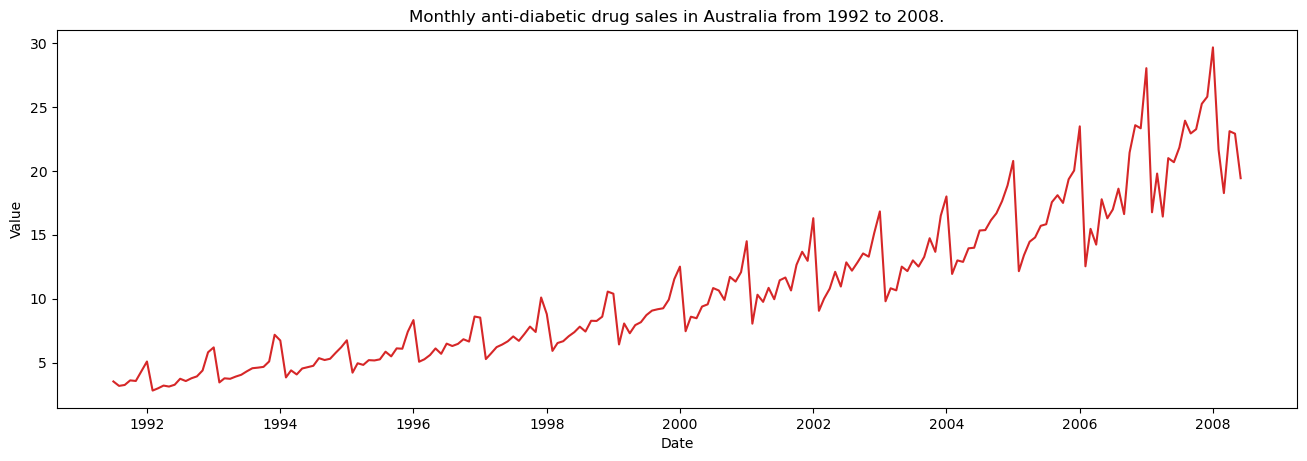

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

### Seasonality

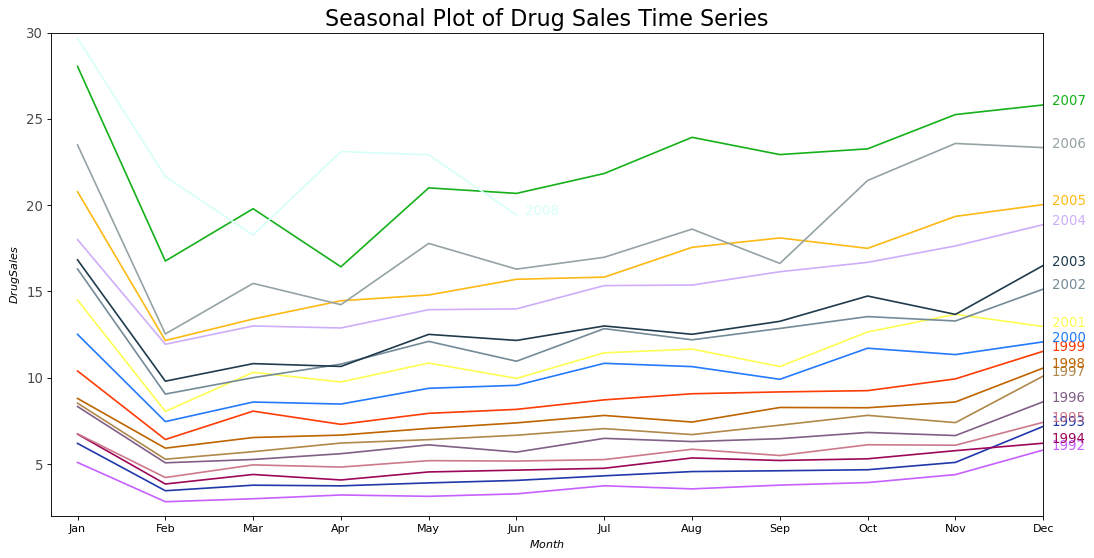

In [17]:
## Seasonality
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,8), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

### Seasonality + Trend

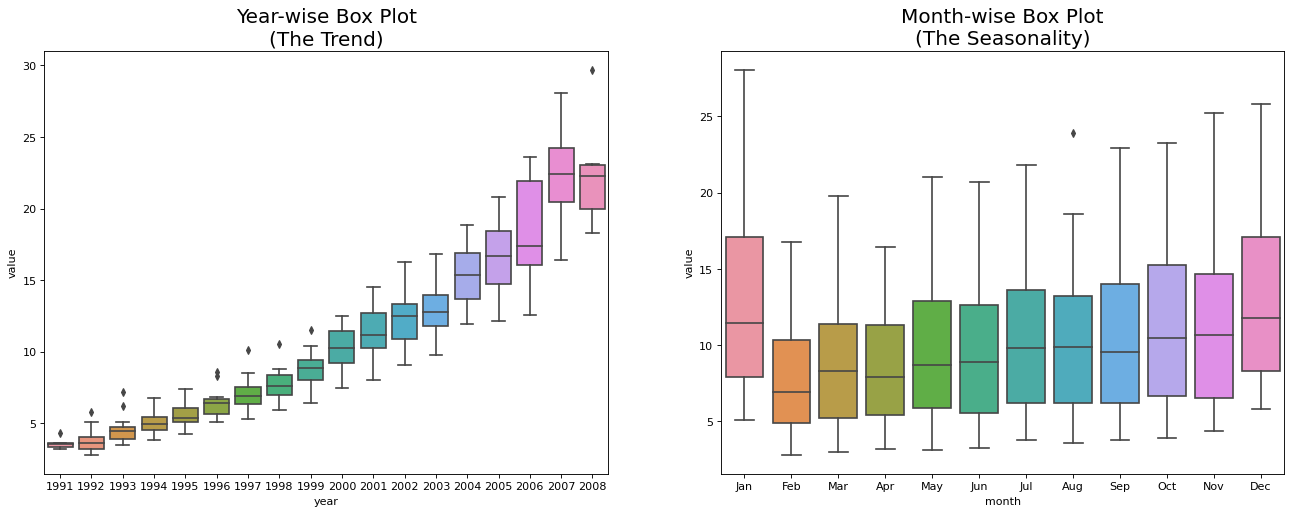

In [18]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Patterns in Time Series

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

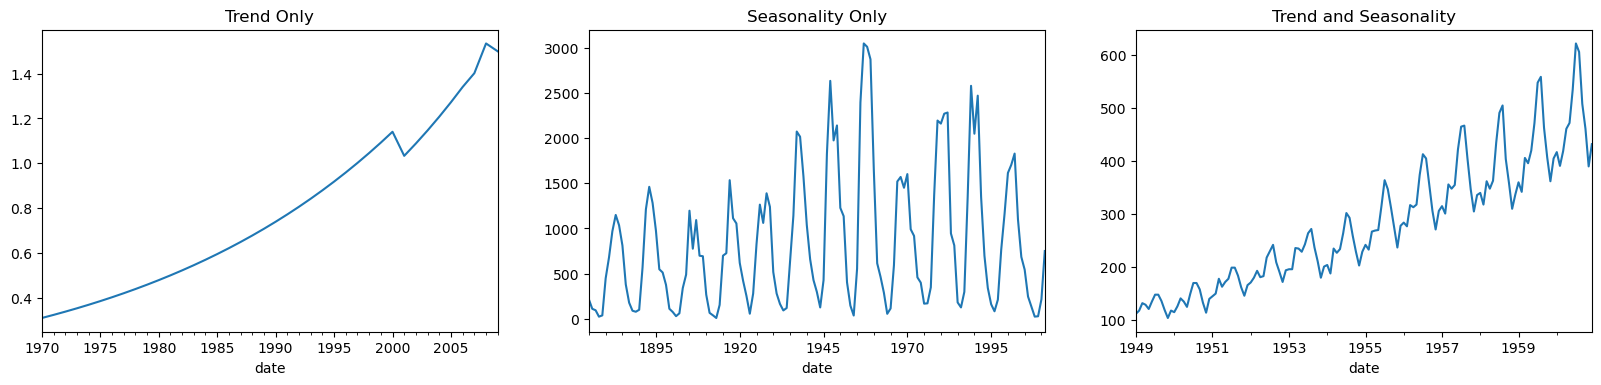

In [19]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

### Additive and multiplicative time series

**Additive time series:**

Value = Base Level + Trend + Seasonality + Error

**Multiplicative Time Series:**

Value = Base Level x Trend x Seasonality x Error

In [20]:
df.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


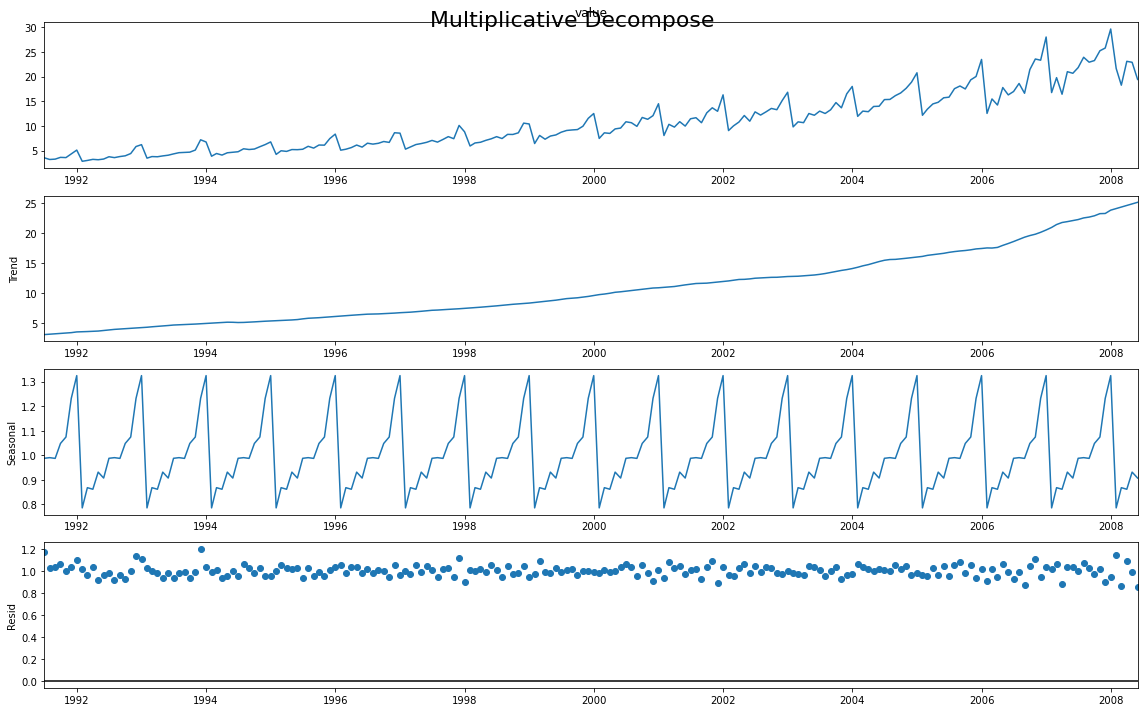

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22);

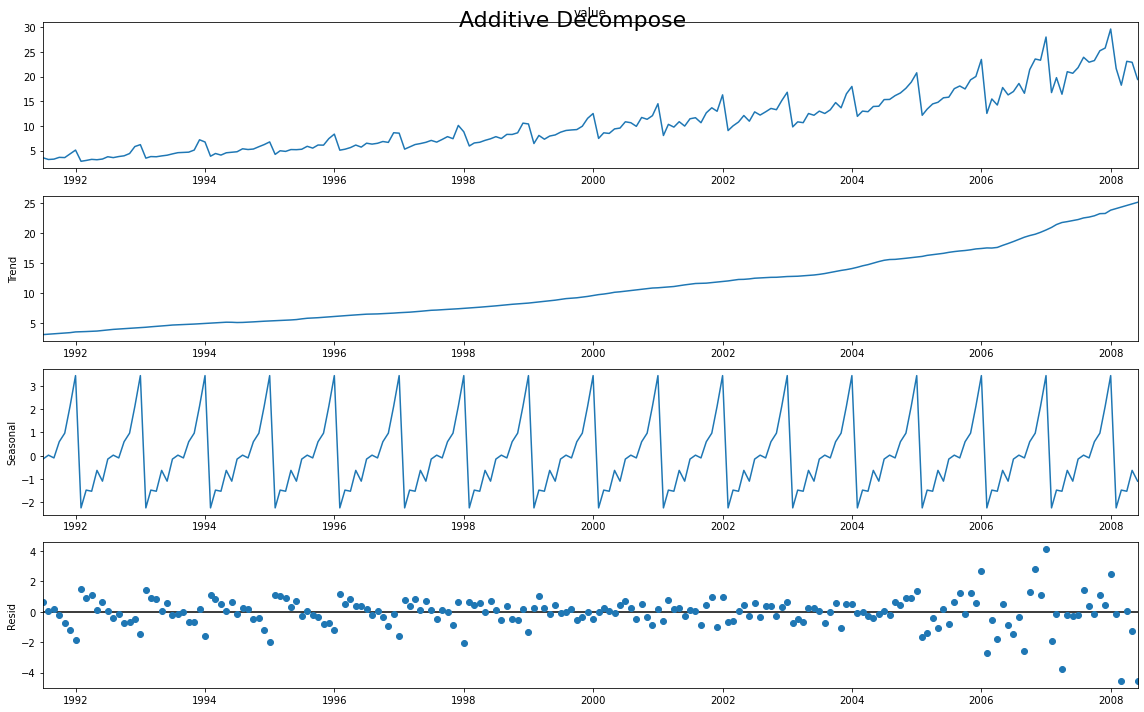

In [28]:
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
result_add.plot().suptitle('Additive Decompose', fontsize=22);

In [29]:
result_mul

In [ ]:
## reset default
plt.rcParams.update({'figure.figsize': (16,4)})

In [25]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


### Stationary and Non-Stationary Time Series


_Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time._

_Forecasting a stationary series is relatively easy and the forecasts are more reliable._

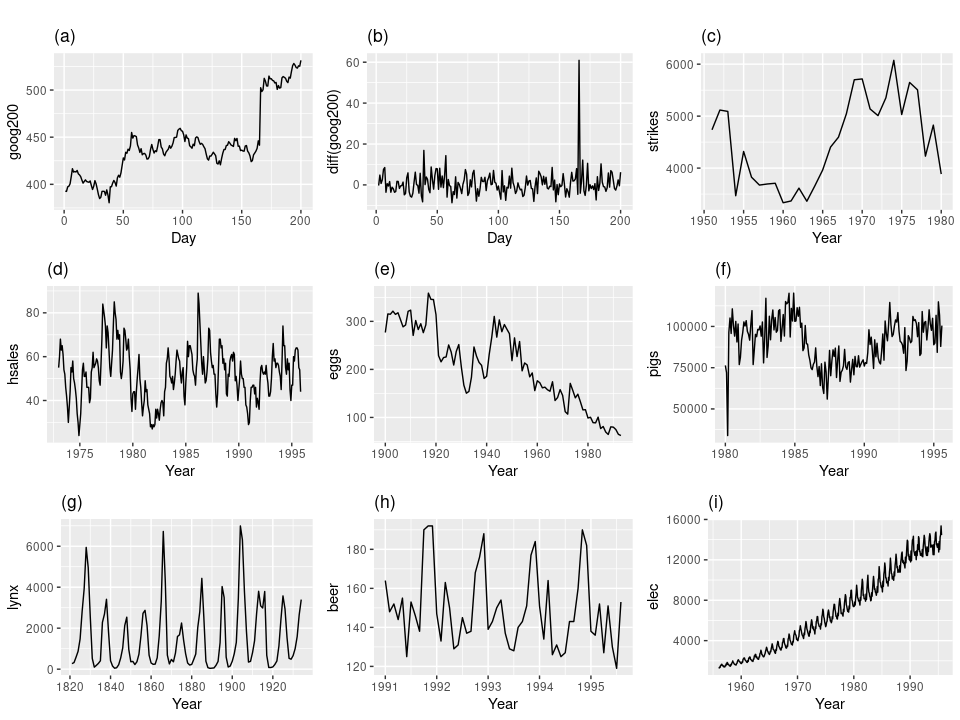

### Why does the time series need to be stationary for analysis? 

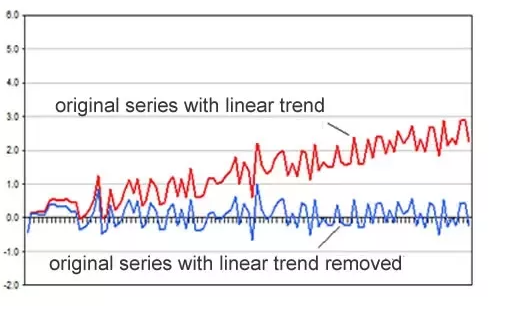

1. It’s easier to analyze and predict a data set with stationarity
2. If a series is consistently increasing over time (like the one above), then the sample mean and variance will also grow with the size of the sample, and your model or the proposed time series solution will always underestimate the mean and variance in the future periods

### How to make a time series stationary?


In [31]:
original = [1,5,9,14,29,35]

diff = [1,5-1, 9-5, 14-9, 29-14,35-29]
diff2 = [1, 4-1, 4-4, 5-4, 15-5, 6-15]
diff2

[1, 3, 0, 1, 10, -9]

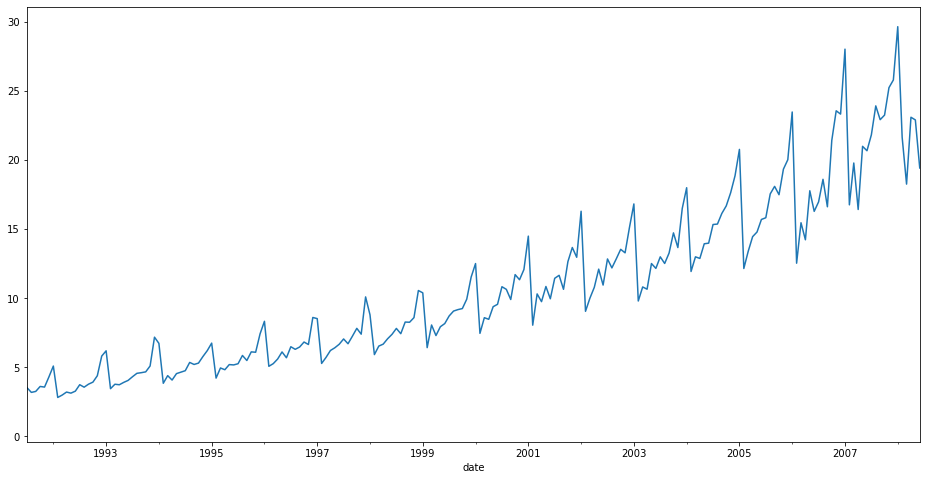

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df['value'].plot(figsize=(16,8))
plt.plot(np.log(df['value']))


- Differencing the Series (once or more)
- Take the log of the series
- Take the nth root of the series
- Combination of the above


For example, consider the following series: [1, 5, 2, 12, 20]

First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

### How to test for stationarity?

There are multiple implementations of Unit Root tests like:

- Augmented Dickey Fuller test (ADH Test)
- Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
    - H0: the data are stationary, and we look for evidence that the null hypothesis is false
- Philips Perron test (PP Test)

In [43]:
(np.log(df.value)).diff()

0           NaN
1     -0.103170
2      0.022177
3      0.104647
4     -0.012578
         ...   
199   -0.314777
200   -0.170220
201    0.235181
202   -0.008482
203   -0.164775
Name: value, Length: 204, dtype: float64

In [46]:
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test (expect p < .05)
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
# KPSS Test
result = kpss((np.log(df.value)).diff().fillna(0), regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067345
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476

KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739

KPSS Statistic: 0.046934
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/home/calestini/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/calestini/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
/home/calestini/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look

### How to detrend a time series?




- Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.

- Subtract the trend component obtained from time series decomposition we saw earlier.

- Subtract the mean

- Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

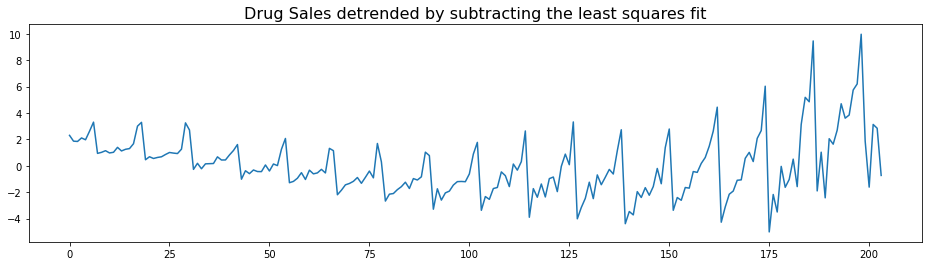

In [32]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.figure(figsize=(16,4))
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16);

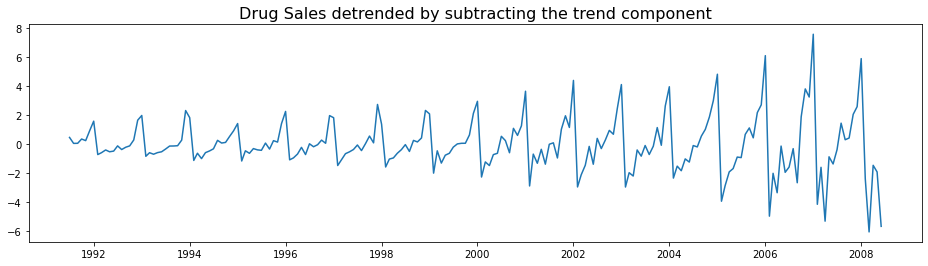

In [35]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.figure(figsize=(16,4))
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16);

### How to deseasonalize a time series?

- Take a moving average with length as the seasonal window. This will smoothen in series in the process.
- Seasonal difference the series (subtract the value of previous season from the current value)
- Divide the series by the seasonal index obtained from STL decomposition

[]

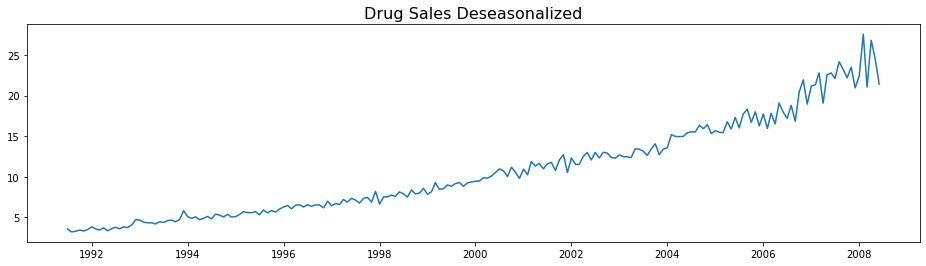

In [3]:
# Subtracting the Trend Component.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.figure(figsize=(16,4))
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

### How to test for seasonality of a time series?

- if you want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot
- Alternately, if you want a statistical test, the CHTest can determine if seasonal differencing is required to stationarize the series.

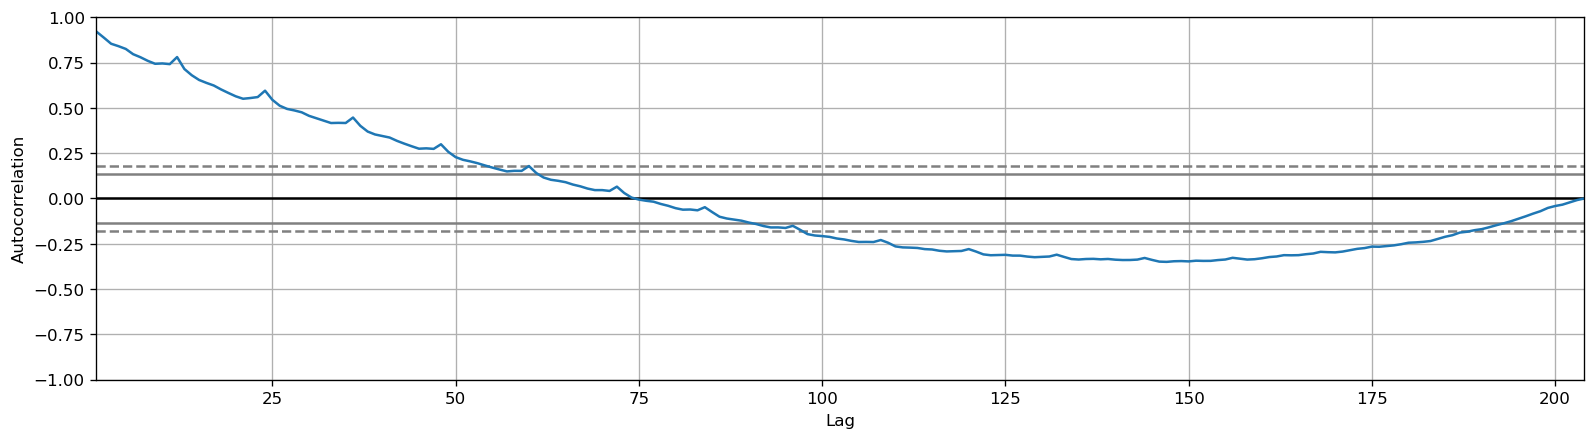

In [38]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(16,4), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist());

### How to treat missing values in a time series?

<ipython-input-40-09fc5811422d>:70: RuntimeWarning: Mean of empty slice
  if np.isnan(np.nanmean(ts_seas)):


<AxesSubplot:title={'center':'Seasonal Mean (MSE: 0.78)'}, xlabel='date'>

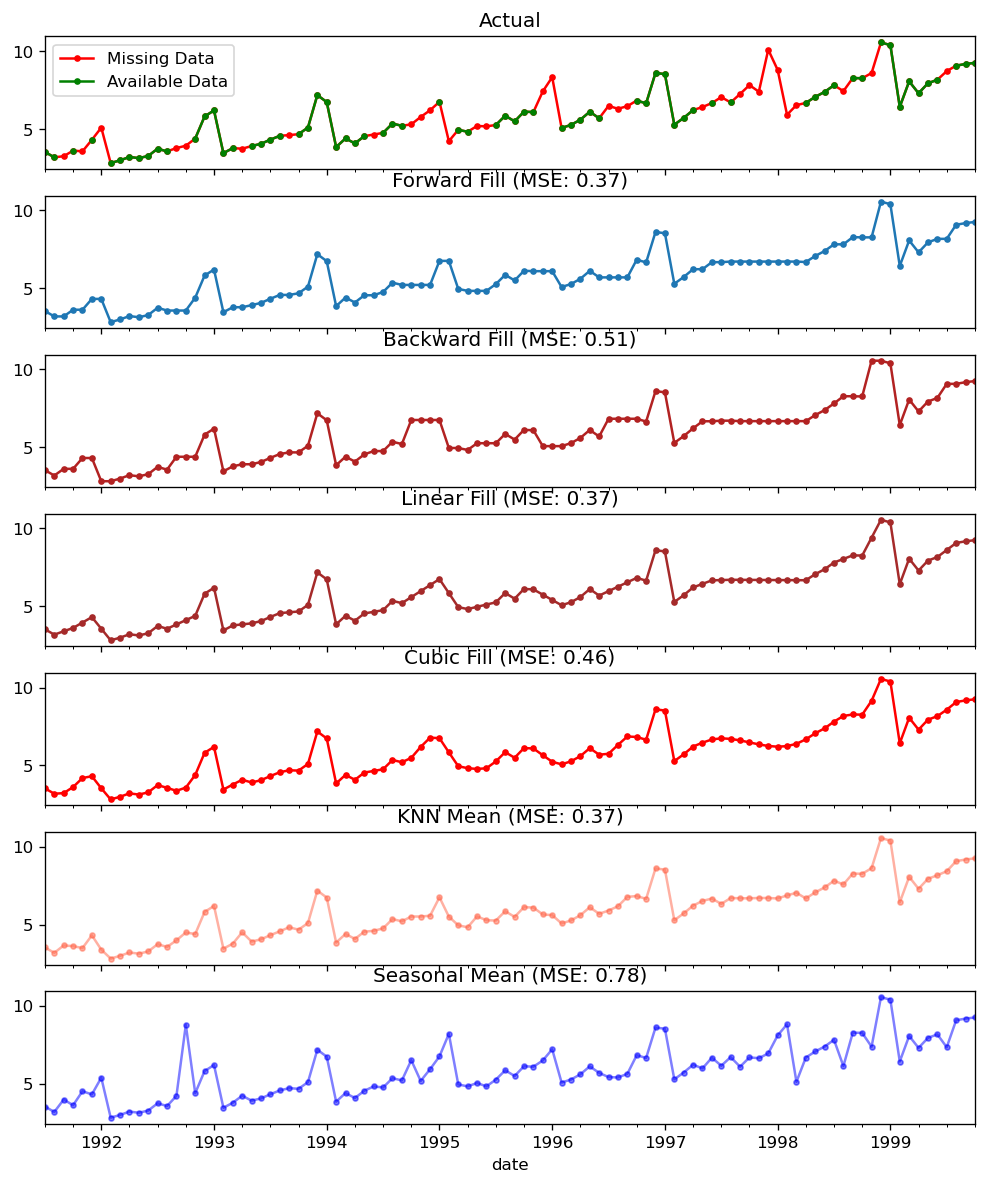

In [40]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

In [49]:
df = pd.DataFrame({'x': [0, 1,2,3,None, 5,6,None, 9]})
df

,x
0,0.0
1,1.0
2,2.0
3,3.0
4,NaN
5,5.0
6,6.0
7,NaN
8,9.0


In [50]:
df.fillna(method='ffill')

,x
0,0.0
1,1.0
2,2.0
3,3.0
4,3.0
5,5.0
6,6.0
7,6.0
8,9.0


In [51]:
df.fillna(method='bfill')

,x
0,0.0
1,1.0
2,2.0
3,3.0
4,5.0
5,5.0
6,6.0
7,9.0
8,9.0


### What is autocorrelation and partial autocorrelation functions?

> Suppose you have 3 points in a time series x3 - x2 - x1. Using ACF you would generally find the correlation between x1 and x2 , for example. The value of correlation thus obtained is technically not true value of correlation, because the value of x2 is likely to be inspired by the value of x3.

> So PACF is that portion of the correlation between x1 and x2, which is not explained by the correlation between x3 in x2.


In [54]:
# Calculate ACF and PACF upto 50 lags
acf_50 = acf(df.value, nlags=50)
pacf_50 = pacf(df.value, nlags=50)

/home/calestini/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [57]:
## simple calculation for auto-correlation
df = pd.DataFrame({'x': [1,2,3,4,5,6]})
df['x-4'] = df['x'].shift(4)
df.corr()

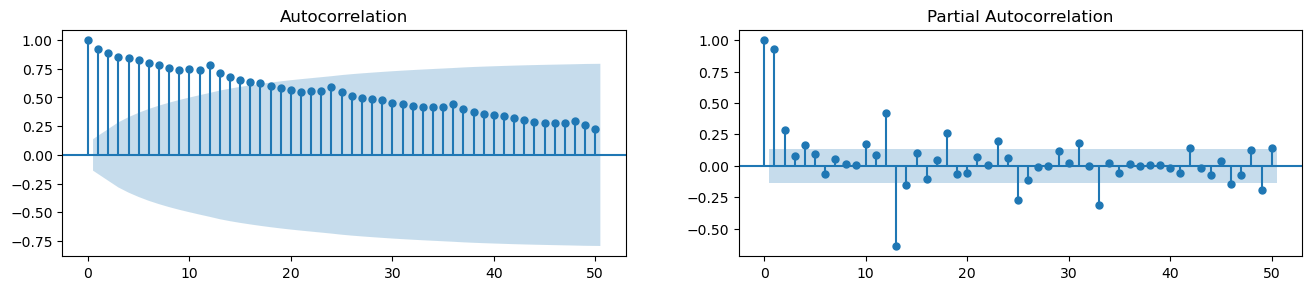

In [53]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1]);

### How to compute partial autocorrelation function?



The partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

For Example, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient $\alpha_3$ of Y_t-3 in the following equation:

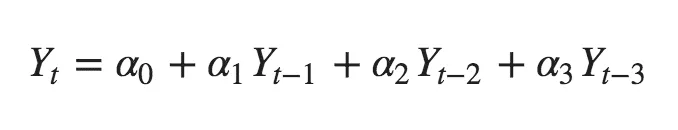

### Lag Plots

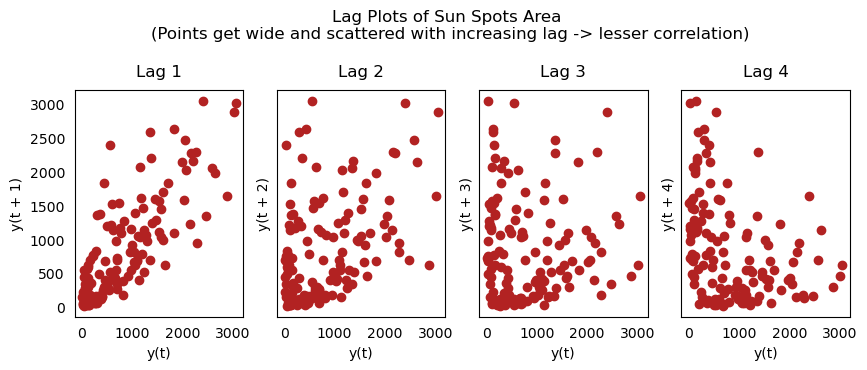

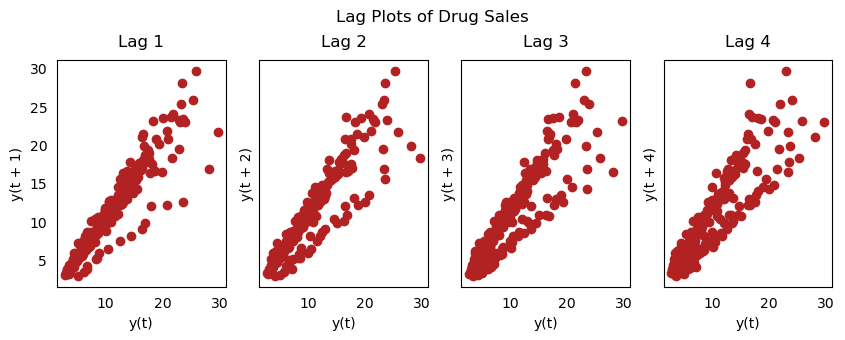

In [45]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

### How to estimate the forecastability of a time series?

The more regular and repeatable patterns a time series has, the easier it is to forecast. The ‘Approximate Entropy’ can be used to quantify the regularity and unpredictability of fluctuations in a time series.

The higher the approximate entropy, the more difficult it is to forecast it.

Another better alternate is the ‘Sample Entropy’.

Sample Entropy is similar to approximate entropy but is more consistent in estimating the complexity even for smaller time series. For example, a random time series with fewer data points can have a lower ‘approximate entropy’ than a more ‘regular’ time series, whereas, a longer random time series will have a higher ‘approximate entropy’.

Sample Entropy handles this problem nicely. See the demonstration below.

In [46]:
# https://en.wikipedia.org/wiki/Approximate_entropy
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(ss.value, m=2, r=0.2*np.std(ss.value)))     # 0.651
print(ApEn(a10.value, m=2, r=0.2*np.std(a10.value)))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

0.6514704970333534
0.5374775224973489
0.16083502693096996
0.5972926771842966


In [47]:
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(ss.value, m=2, r=0.2*np.std(ss.value)))      # 0.78
print(SampEn(a10.value, m=2, r=0.2*np.std(a10.value)))    # 0.41
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

0.7853311366380039
0.41887013457621214
inf
2.0794415416798357


<ipython-input-47-56fff2349b7c>:13: RuntimeWarning: divide by zero encountered in log
  return -np.log(_phi(m+1) / _phi(m))


### Why and How to smoothen a time series?

**Why**
- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better
  
**How**

- Take a moving average
- Do a LOESS smoothing (Localized Regression)
- Do a LOWESS smoothing (Locally Weighted Regression)


LOESS, short for ‘LOcalized regrESSion’ fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

### Exponential Smoothing Models

Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time [source](https://en.wikipedia.org/wiki/Exponential_smoothing)

### AutoRegressive Models

> In a multiple regression model, we forecast the variable of interest using a linear combination of predictors. In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself.
>Thus, an autoregressive model of order p can be written as 

yt=c+ϕ1yt−1+ϕ2yt−2+⋯+ϕpyt−p+εt,

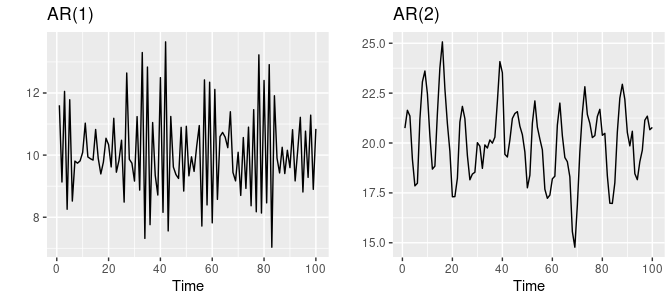

> Figure 8.5: Two examples of data from autoregressive models with different parameters. Left: AR(1) with yt=18−0.8yt−1+εt. Right: AR(2) with yt=8+1.3yt−1−0.7yt−2+εt. In both cases, εt is normally distributed white noise with mean zero and variance one. 

> We normally restrict autoregressive models to stationary data, in which case some constraints on the values of the parameters are required.
> - For an AR(1) model: −1<ϕ1<1
> - For an AR(2) model: −1<ϕ2<1, ϕ1+ϕ2<1, ϕ2−ϕ1<1
> - When p≥3
, the restrictions are much more complicated. R takes care of these restrictions when estimating a model.

[source](https://otexts.com/fpp2/AR.html)

### Moving Average Models

> Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model. 

yt=c+εt+θ1εt−1+θ2εt−2+⋯+θqεt−q,

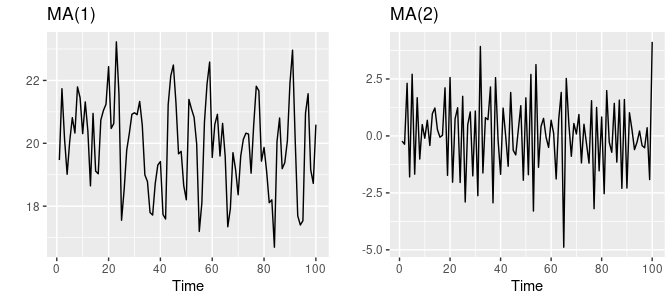

> Figure 8.6: Two examples of data from moving average models with different parameters. Left: MA(1) with yt=20+εt+0.8εt−1. Right: MA(2) with yt=εt−εt−1+0.8εt−2. In both cases, εt is normally distributed white noise with mean zero and variance one. 

[source](https://otexts.com/fpp2/MA.html)

### ARMA(p,q) Models

- homework

### ARIMA (p,d,q)

- homework

### References

- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
- https://otexts.com/fpp2/stationarity.html
- https://www.analyticsvidhya.com/blog/2021/04/time-series-analysis-forecast-covid-19-vaccination-rate/
- https://en.wikipedia.org/wiki/Decomposition_of_time_series
- https://en.wikipedia.org/wiki/Exponential_smoothing
- https://en.wikipedia.org/wiki/Partial_autocorrelation_function
- https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
- https://www.amazon.ca/dp/3319298526?tag=otexts08-20&th=1&psc=1&geniuslink=true
- https://www.amazon.ca/dp/1118675029?tag=otexts08-20&geniuslink=true

### Appendix: Covid 19 Vaccinations

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

In [66]:
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [95]:
# pivot-melt to generate same date for all countries.
daily_vac = pd.melt(
        df.pivot('iso_code','date','daily_vaccinations').reset_index(), id_vars=['iso_code']
).sort_values(['iso_code','date'])

In [97]:
daily_vac['value'] = daily_vac.groupby('iso_code')['value'].fillna(method='ffill').fillna(0)

In [98]:
daily_vac.head(10)

,iso_code,date,value
0,ABW,2020-12-02,0.0
223,ABW,2020-12-03,0.0
446,ABW,2020-12-04,0.0
669,ABW,2020-12-05,0.0
892,ABW,2020-12-06,0.0
1115,ABW,2020-12-07,0.0
1338,ABW,2020-12-08,0.0
1561,ABW,2020-12-09,0.0
1784,ABW,2020-12-10,0.0
2007,ABW,2020-12-11,0.0


In [119]:
def plot_country(df, iso):
    
    subset = df[df['iso_code']==iso].reset_index(drop=True).drop('iso_code', axis=1)#.set_index('date')
    subset['cum_value'] = subset['value'].cumsum()
    
    plt.figure(figsize=(16,8))
    plt.subplot(211)
    plt.title(f'Daily Vaccinations - {iso}', fontsize=16)
    plt.plot(subset.index, subset['value'])
    plt.scatter(subset.index, subset['value'])
    plt.xlabel('Days')
    plt.ylabel('Vaccinations')
    plt.bar(subset.index, subset['value'], color='grey', alpha=0.2)
    plt.subplot(212)
    plt.title(f'Cumulative Daily Vaccinations - {iso}', fontsize=16)
    plt.plot(subset.index, subset['cum_value'])
    plt.scatter(subset.index, subset['cum_value'])
    plt.bar(subset.index, subset['cum_value'], color='grey', alpha=0.2)
    plt.xlabel('Days')
    plt.ylabel('Vaccinations')
    plt.tight_layout()
    plt.show()

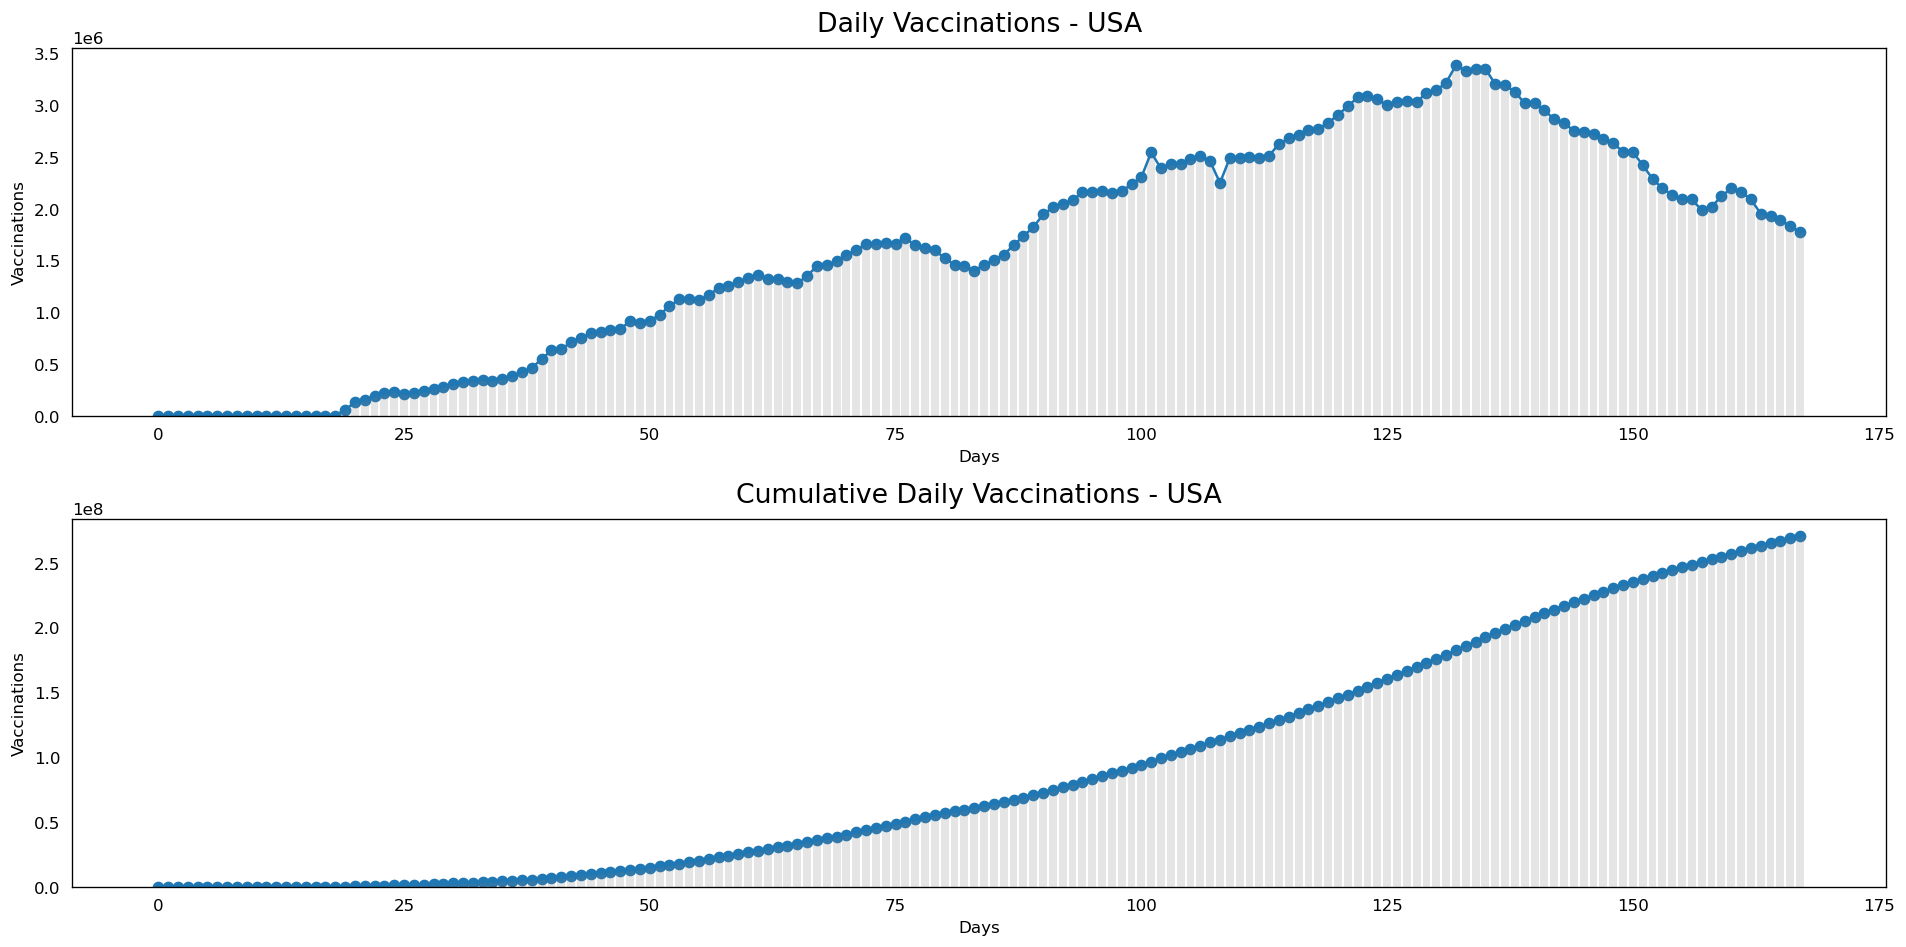

In [121]:
plot_country(daily_vac, 'USA')